----------
### Комментарий от наставника

Привет! Спасибо за проект. Получилось очень наглядно и последовательно для ознакомления.

Остался вопрос по удалению выбросов после объединения. Подробный комментарий после применения фильтров:
```python
data_boxplot = data.query('total_price <= 3800')...
```

Возможно, логичнее удалить выбросы до объединения таблиц. Посмотри, пожалуйста, этот момент. Напиши какой вариант тебе видится более логичным.

Также добавил комментарии по вычислениям. Если получится поправить будет здорово.

----------

----

## Комментарий

Поправил функцию округления значений в большую сторону.
Применил к столбцам .apply(math.ceil)
На счет price = data, понял в конце, что новый датафрейм не создаётся. Делал это для того что бы провести вычисления и не испортить итоговую таблицу. В конце понял, что всё хорошо, поэтому не стал ничего менять.

Если честно, то я вообще не считаю, что в этом проекте существуют выбросы. Например максимальное значений по количеству минут это 1727 минут. 1727 это чуть больше 1 часа разговора в день. Очень даже возможное значение.
У интернета максимальное значение это 49гб. (по личному опыту могу сказать, что очень даже реально. Отдыхал на даче неделю, со своего телефона раздал интернет для ноутбука, потратил больше 50гб на просмотр фильмов и серилов.) Так же и максимальное значение сообщений 224. Когда плохо ловит интернет, сообщения очень даже помогают.
Но для чистоты эксперемента я удалил все выбросы до объединения таблиц. (Код после вывода)
Сделал без средней выручки (так как jupyter отказывается её считать, но думаю там различия минимальные)
#### Результаты:


Удалил выбросы до объединения.
ultra   

| gb_used |	messages_count | sum_duration |
|---|---|---|
| 18 | 45.0 | 520.0 |


smart

| gb_used | messages_count | sum_duration |
|---|---|---|
| 17 | 33.0 | 434.0 |

Мой итоговой вариант в работе.

ultra

| gb_used | messages_count | sum_duration |	total_price |
|---|---|---|---|
| 19 | 51.0 | 548.0 | 1950.0|
  
  
smart

| gb_used |	messages_count | sum_duration |	total_price |
|---|---|---|---|
| 17 | 34.0 | 433.0 | 1044.5 |



-----

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
print('Звонки')
calls.head()

Звонки


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
print('Интернет')
internet.head()

Интернет


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [4]:
print('Сообщения')
messages.head()

Сообщения


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
print('Тарифы')
tariffs.head()

Тарифы


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
print('Пользователи')
users.head()

Пользователи


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


----

Начнем обработку с таблицы calls

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Видим, что в таблице встречаются нулевые значения. Нам известно, что оператор округляет все значения в большую сторону. Так нулевые значения всё таки присутствуют, сделаем вывод, что звонок был, поэтому поменяем все эти значения на 1. Потом напишем функцию, округляющую все значения в наибольшую сторону.

----------
### Комментарий от наставника

Мини-рекомендация - лучше не использовать сокращения вроде 0вые. В данном случае экономия получается очень небольшой, а знатоки русского языка могут докопаться. "Нулевые значения" вполне стандартное выражение. 

----------

In [9]:
calls.loc[calls['duration'] == 0.00, 'duration'] = 1

def duration_round(x):
    if x==int(x):
        return x
    else:
        a=int(x)
        b=a+1
        return b

----------
### Комментарий от наставника

В качестве упрощения можно использовать метод math.ceil (округление в бОльшую сторону):

```python
import math
math.ceil(2.0)
```
2.0

```python
math.ceil(2.1)
```
3.0

----------

In [10]:
calls['duration'] = calls['duration'].apply(math.ceil)

In [11]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Функция работает. Теперь все значения округлены, а значения целочисленные значения остались без изменений.

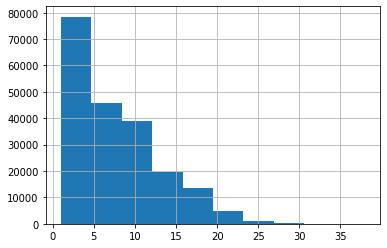

In [12]:
calls['duration'].hist()

Больших выбросов данных нет.
Далее сгруппируем звонки по месяцам, посчитаем их количество и общую сумму использованных минут.

In [13]:
calls['call_date'].head()

0    2018-07-25
1    2018-08-17
2    2018-06-11
3    2018-09-21
4    2018-12-15
Name: call_date, dtype: object

Заметим, что дата в этой таблице имеет нет тот тип, поменяем его, и выделим месяца.

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [15]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [16]:
calls_sum = calls.pivot_table(index=('user_id','month'),values='duration', aggfunc=('count','sum'))

In [17]:
calls_sum.head()

count  sum
user_id month            
1000    5         22  164
        6         43  187
        7         47  346
        8         52  418
        9         58  478

Переименуем столбцы для ясности вычислений.

In [18]:
calls_sum.columns = ['count_duration','sum_duration']

In [19]:
calls_sum.head()

count_duration  sum_duration
user_id month                              
1000    5                  22           164
        6                  43           187
        7                  47           346
        8                  52           418
        9                  58           478

Обработка таблицы calls закончена 

-----

-----

Следующая таблица internet

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [21]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Проверим эту таблицу на 0вые значения.

In [22]:
internet.loc[internet['mb_used'] == 0.00, 'mb_used'].count()

19598

Придерживаясь мнения о том, что если значения попали в таблицу, то оператор считает это за использованные ресурсы, поэтому поменяем все 0-ые значения на 1мб.

In [23]:
internet.loc[internet['mb_used'] == 0.00, 'mb_used'] = 1

В этой таблице так же сгруппируем использованный трафик по месяцам.

In [24]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [25]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Посчитаем весь использованный трафик по месяцам.

In [26]:
internet_sum = internet.pivot_table(index=('user_id','month'), values='mb_used',aggfunc='sum')

In [27]:
internet_sum.head()

mb_used
user_id month          
1000    5       2254.49
        6      23238.77
        7      14004.64
        8      14057.93
        9      14570.91

Предлагаю сразу перевести мегабайты в гигабайты для удобства вычисления.

In [28]:
internet_sum['mb_used'] = internet_sum['mb_used'] / 1024

Сразу переименуем столбец в gb_used

In [29]:
internet_sum.columns = ['gb_used']

In [30]:
internet_sum.head()

gb_used
user_id month           
1000    5       2.201650
        6      22.694111
        7      13.676406
        8      13.728447
        9      14.229404

Так как оператор учитывает, только использованные гигабайты, можно сразу округлить все данные в большую сторону, но я это сделаю только после вычисления месячного остатка.

def internet_round(x):
    if x==int(x):
        return x
    else:
        a=int(x)
        b=a+1
        return b

----------
### Комментарий от наставника

Вроде можно переиспользовать функцию duration_round. Сейчас это не имеет особого значения, но в перспективе в случае необходимости придется менять обе функции (например, потребуют отменить замену 0 на 1).

----------

In [31]:
internet_sum['gb_used'] = internet_sum['gb_used'].apply(math.ceil)

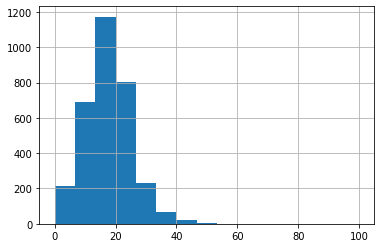

In [32]:
internet_sum['gb_used'].hist(bins=15, range=(0,100))

In [33]:
internet_sum.head()

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15

Больших выбросов данных не обнаружено!

Таблица internet обработана.

-----

-------

На очереди таблица messages.

In [34]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [35]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Сгруппируем эту таблицу по месяцам и найдем количество отправленных сообщений.

In [36]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [37]:
messages_sum = messages.pivot_table(index=('user_id','month'), values='message_date',aggfunc='count')

In [38]:
messages_sum.columns = ['messages_count']

In [39]:
messages_sum.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

Таблица обработана.

-----

-----

Следующая таблица tariffs

In [40]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


In [41]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Заметим, что в таблице users, наименование тарифов находится в столбце tariff, переименуем в этой таблице столбец tariff_name

так же переведем столбец mg_per_month_included в гигабайты и сразу его переименуем

In [42]:
tariffs['mg_per_month_included'] = tariffs['mg_per_month_included'] / 1024

In [43]:
print(tariffs.columns)

Index(['messages_included', 'mg_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')


In [44]:
tariffs.columns = ['messages_included', 'GB_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [45]:
tariffs.head()

,messages_included,GB_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Таблица обработана

-----

-----

Следующая таблица users

In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


In [47]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Теперь склеим все таблицы в одну.

In [48]:
calls_sum.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
count_duration    3174 non-null int64
sum_duration      3174 non-null int64
dtypes: int64(2)
memory usage: 63.0 KB


In [49]:
internet_sum.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
gb_used    3203 non-null int64
dtypes: int64(1)
memory usage: 38.5 KB


In [50]:
calls_intnernet = internet_sum.reset_index().merge(calls_sum, on = ['user_id', 'month'], how='left', left_index = True)

In [51]:
calls_intnernet.head()

,user_id,month,gb_used,count_duration,sum_duration
0,1000,5,3,22.0,164.0
1,1000,6,23,43.0,187.0
2,1000,7,14,47.0,346.0
3,1000,8,14,52.0,418.0
4,1000,9,15,58.0,478.0


In [145]:
calls_intnernet['count_duration']

NameError: name 'calls_internet' is not defined

In [52]:
calls_intnernet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3173
Data columns (total 5 columns):
user_id           3203 non-null int64
month             3203 non-null int64
gb_used           3203 non-null int64
count_duration    3163 non-null float64
sum_duration      3163 non-null float64
dtypes: float64(2), int64(3)
memory usage: 150.1 KB


К этой таблице добавим messages_sum

In [53]:
calls_internet_mes = calls_intnernet.reset_index().merge(messages_sum, on = ['user_id', 'month'], how='left', left_index = True )

In [54]:
calls_internet_mes.reset_index()

,level_0,index,user_id,month,gb_used,count_duration,sum_duration,messages_count
0,0,0,1000,5,3,22.0,164.0,22.0
1,1,1,1000,6,23,43.0,187.0,60.0
2,2,2,1000,7,14,47.0,346.0,75.0
3,3,3,1000,8,14,52.0,418.0,81.0
4,4,4,1000,9,15,58.0,478.0,57.0
5,5,5,1000,10,15,57.0,363.0,73.0
6,6,6,1000,11,15,43.0,344.0,58.0
7,7,7,1000,12,10,46.0,341.0,70.0
8,2716,8,1001,11,19,59.0,444.0,NaN
9,2716,9,1001,12,14,63.0,430.0,NaN


In [55]:
calls_internet_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 2716
Data columns (total 7 columns):
index             3203 non-null int64
user_id           3203 non-null int64
month             3203 non-null int64
gb_used           3203 non-null int64
count_duration    3163 non-null float64
sum_duration      3163 non-null float64
messages_count    2706 non-null float64
dtypes: float64(3), int64(4)
memory usage: 200.2 KB


In [56]:
users_data = calls_internet_mes.reset_index().merge(users, on = ['user_id'], how='left', left_index = True)

In [57]:
users_data.head()

,level_0,index,user_id,month,gb_used,count_duration,sum_duration,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff
0,0,0,1000,5,3,22.0,164.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
0,1,1,1000,6,23,43.0,187.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
0,2,2,1000,7,14,47.0,346.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
0,3,3,1000,8,14,52.0,418.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
0,4,4,1000,9,15,58.0,478.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [58]:
total = users_data.merge(tariffs, on = ['tariff'], how='left', left_index = True)

In [59]:
total.head()

,level_0,index,user_id,month,gb_used,count_duration,sum_duration,messages_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,GB_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1,0,0,1000,5,3,22.0,164.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1,1,1000,6,23,43.0,187.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,2,2,1000,7,14,47.0,346.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,3,3,1000,8,14,52.0,418.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,4,4,1000,9,15,58.0,478.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1


In [60]:
total.columns

Index(['level_0', 'index', 'user_id', 'month', 'gb_used', 'count_duration',
       'sum_duration', 'messages_count', 'age', 'churn_date', 'city',
       'first_name', 'last_name', 'reg_date', 'tariff', 'messages_included',
       'GB_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute'],
      dtype='object')

In [61]:
data = total.pivot_table(index=('user_id','tariff','city','month'), values=('sum_duration','count_duration', 'gb_used',
       'messages_count','messages_included',
       'GB_per_month_included', 'minutes_included', 'rub_monthly_fee',
       'rub_per_gb', 'rub_per_message', 'rub_per_minute'))

In [62]:
data.head(15)

GB_per_month_included  count_duration  \
user_id tariff city        month                                          
1000    ultra  Краснодар   5                       30.0            22.0   
                           6                       30.0            43.0   
                           7                       30.0            47.0   
                           8                       30.0            52.0   
                           9                       30.0            58.0   
                           10                      30.0            57.0   
                           11                      30.0            43.0   
                           12                      30.0            46.0   
1001    smart  Москва      11                      15.0            59.0   
                           12                      15.0            63.0   
1002    smart  Стерлитамак 6                       15.0            15.0   
                           7                       15.0            26.0   
                           8                       15.0            42.0   
                           9                       15.0            36.0   
                           10                      15.0            33.0   

                                  gb_used  messages_count  messages_included  \
user_id tariff city        month                                               
1000    ultra  Краснодар   5            3            22.0               1000   
                           6           23            60.0               1000   
                           7           14            75.0               1000   
                           8           14            81.0               1000   
                           9           15            57.0               1000   
                           10          15            73.0               1000   
                           11          15            58.0               1000   
                           12          10            70.0               1000   
1001    smart  Москва      11          19             NaN                 50   
                           12          14             NaN                 50   
1002    smart  Стерлитамак 6           11             4.0                 50   
                           7           18            11.0                 50   
                           8           20            13.0                 50   
                           9           17             4.0                 50   
                           10          14            10.0                 50   

                                  minutes_included  rub_monthly_fee  \
user_id tariff city        month                                      
1000    ultra  Краснодар   5                  3000             1950   
                           6                  3000             1950   
                           7                  3000             1950   
                           8                  3000             1950   
                           9                  3000             1950   
                           10                 3000             1950   
                           11                 3000             1950   
                           12                 3000             1950   
1001    smart  Москва      11                  500              550   
                           12                  500              550   
1002    smart  Стерлитамак 6                   500              550   
                           7                   500              550   
                           8                   500              550   
                           9                   500              550   
                           10                  500              550   

                                  rub_per_gb  rub_per_message  rub_per_minute  \
user_id tariff city        month                                                
1000    ultra  Краснодар   

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, ultra, Краснодар, 5) to (1499, smart, Пермь, 12)
Data columns (total 11 columns):
GB_per_month_included    3203 non-null float64
count_duration           3163 non-null float64
gb_used                  3203 non-null int64
messages_count           2706 non-null float64
messages_included        3203 non-null int64
minutes_included         3203 non-null int64
rub_monthly_fee          3203 non-null int64
rub_per_gb               3203 non-null int64
rub_per_message          3203 non-null int64
rub_per_minute           3203 non-null int64
sum_duration             3163 non-null float64
dtypes: float64(4), int64(7)
memory usage: 295.8+ KB


Найдем помесячную выручку с каждого пользователя

In [64]:
price = data

----------
### Комментарий от наставника

С ходу не понял зачем вводить еще один датафрейм. Но в целом никаких противоречий не возникает.

На всякий случай - команда price = data  по факту не создает новый датафрейм. Все изменения в price автоматом перенесутся в data. Ниже пример "копирования", которое меняет исходный датафрейм. Все из-за того, что операция b = a создает 2 указателя на один и тот же объект. Это можно проверить, сравнив идентификаторы этиъ объектов:
```python
id(a) == id(b)
```

Для создания настоящего клона датафрейма надо использовать модуль copy
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html

----------

In [65]:
a = pd.DataFrame({'column1': [1, 2 ,3]})
a

,column1
0,1
1,2
2,3


In [66]:
b = a
b['column2'] = 1
b

,column1,column2
0,1,1
1,2,1
2,3,1


In [67]:
a

,column1,column2
0,1,1
1,2,1
2,3,1


In [68]:
id(a), id(b)

(139822876648336, 139822876648336)

In [69]:
price.head()

GB_per_month_included  count_duration  \
user_id tariff city      month                                          
1000    ultra  Краснодар 5                       30.0            22.0   
                         6                       30.0            43.0   
                         7                       30.0            47.0   
                         8                       30.0            52.0   
                         9                       30.0            58.0   

                                gb_used  messages_count  messages_included  \
user_id tariff city      month                                               
1000    ultra  Краснодар 5            3            22.0               1000   
                         6           23            60.0               1000   
                         7           14            75.0               1000   
                         8           14            81.0               1000   
                         9           15            57.0               1000   

                                minutes_included  rub_monthly_fee  rub_per_gb  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                  3000             1950         150   
                         6                  3000             1950         150   
                         7                  3000             1950         150   
                         8                  3000             1950         150   
                         9                  3000             1950         150   

                                rub_per_message  rub_per_minute  sum_duration  
user_id tariff city      month                                                 
1000    ultra  Краснодар 5                    1               1         164.0  
                         6                    1               1         187.0  
                         7                    1               1         346.0  
                         8                    1               1         418.0  
                         9                    1               1         478.0

Найдем остаток по тарифу за каждый месяц. Если наше значение будет отрицательным, то у пользователя перерасход по тарифу

In [70]:
price['balance_calls'] = price['minutes_included'] - price['sum_duration']
price['balance_internet'] = price['GB_per_month_included'] - price['gb_used']
price['balance_messages'] = price['messages_included'] - price['messages_count']

In [71]:
price.head()

GB_per_month_included  count_duration  \
user_id tariff city      month                                          
1000    ultra  Краснодар 5                       30.0            22.0   
                         6                       30.0            43.0   
                         7                       30.0            47.0   
                         8                       30.0            52.0   
                         9                       30.0            58.0   

                                gb_used  messages_count  messages_included  \
user_id tariff city      month                                               
1000    ultra  Краснодар 5            3            22.0               1000   
                         6           23            60.0               1000   
                         7           14            75.0               1000   
                         8           14            81.0               1000   
                         9           15            57.0               1000   

                                minutes_included  rub_monthly_fee  rub_per_gb  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                  3000             1950         150   
                         6                  3000             1950         150   
                         7                  3000             1950         150   
                         8                  3000             1950         150   
                         9                  3000             1950         150   

                                rub_per_message  rub_per_minute  sum_duration  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                    1               1         164.0   
                         6                    1               1         187.0   
                         7                    1               1         346.0   
                         8                    1               1         418.0   
                         9                    1               1         478.0   

                                balance_calls  balance_internet  \
user_id tariff city      month                                    
1000    ultra  Краснодар 5             2836.0              27.0   
                         6             2813.0               7.0   
                         7             2654.0              16.0   
                         8             2582.0              16.0   
                         9             2522.0              15.0   

                                balance_messages  
user_id tariff city      month                    
1000    ultra  Краснодар 5                 978.0  
                         6                 940.0  
                         7                 925.0  
                         8                 919.0  
                         9                 943.0

Оставим только пользователей которые имеют перерасход по тарифу. Найдем переплату за звонки, смс и интернет.

In [72]:
price['surcharge_messages'] = abs(price.loc[price['balance_messages'] < 0, 'balance_messages'] * price['rub_per_message'])

Сделаем тоже самое для интернета и звонков.

In [73]:
price['surcharge_calls'] = abs(price.loc[price['balance_calls'] < 0, 'balance_calls'] * price['rub_per_minute'])

In [74]:
price['balance_internet'].min()

-23.0

In [75]:
price['surcharge_internet'] = abs(price.loc[price['balance_internet'] < 0, 'balance_internet'] * price['rub_per_gb'])

In [76]:
price.head()

GB_per_month_included  count_duration  \
user_id tariff city      month                                          
1000    ultra  Краснодар 5                       30.0            22.0   
                         6                       30.0            43.0   
                         7                       30.0            47.0   
                         8                       30.0            52.0   
                         9                       30.0            58.0   

                                gb_used  messages_count  messages_included  \
user_id tariff city      month                                               
1000    ultra  Краснодар 5            3            22.0               1000   
                         6           23            60.0               1000   
                         7           14            75.0               1000   
                         8           14            81.0               1000   
                         9           15            57.0               1000   

                                minutes_included  rub_monthly_fee  rub_per_gb  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                  3000             1950         150   
                         6                  3000             1950         150   
                         7                  3000             1950         150   
                         8                  3000             1950         150   
                         9                  3000             1950         150   

                                rub_per_message  rub_per_minute  sum_duration  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                    1               1         164.0   
                         6                    1               1         187.0   
                         7                    1               1         346.0   
                         8                    1               1         418.0   
                         9                    1               1         478.0   

                                balance_calls  balance_internet  \
user_id tariff city      month                                    
1000    ultra  Краснодар 5             2836.0              27.0   
                         6             2813.0               7.0   
                         7             2654.0              16.0   
                         8             2582.0              16.0   
                         9             2522.0              15.0   

                                balance_messages  surcharge_messages  \
user_id tariff city      month                                         
1000    ultra  Краснодар 5                 978.0                 NaN   
                         6                 940.0                 NaN   
                         7                 925.0                 NaN   
                         8                 919.0                 NaN   
                         9                 943.0                 NaN   

                                surcharge_calls  surcharge_internet  
user_id tariff city      month                                       
1000    ultra  Краснодар 5                  NaN                 NaN  
                         6                  NaN                 NaN  
                         7                  NaN                 NaN  
                         8                  NaN                 NaN  
                         9                  NaN                 NaN

In [77]:
price['surcharge_internet'].max()

4600.0

In [78]:
price['surcharge_messages'].max()

279.0

In [79]:
price['surcharge_calls'].max()

2913.0

В этой таблице появились NaN, они означают то, что переплаты нет, поэтому смело можем заменить их на 0

In [80]:
price['surcharge_internet'] = price['surcharge_internet'].fillna(0)

In [81]:
price['surcharge_messages'] = price['surcharge_messages'].fillna(0)

In [82]:
price['surcharge_calls'] = price['surcharge_calls'].fillna(0)

Нам остается добавить ещё один столбец, в котором будет находиться полная выручка с пользователя за каждый месяц.

In [83]:
price['total_price'] = (price['surcharge_internet'] + price['surcharge_messages'] + price['surcharge_calls']) + price['rub_monthly_fee']

In [84]:
price.head(10)

GB_per_month_included  count_duration  \
user_id tariff city      month                                          
1000    ultra  Краснодар 5                       30.0            22.0   
                         6                       30.0            43.0   
                         7                       30.0            47.0   
                         8                       30.0            52.0   
                         9                       30.0            58.0   
                         10                      30.0            57.0   
                         11                      30.0            43.0   
                         12                      30.0            46.0   
1001    smart  Москва    11                      15.0            59.0   
                         12                      15.0            63.0   

                                gb_used  messages_count  messages_included  \
user_id tariff city      month                                               
1000    ultra  Краснодар 5            3            22.0               1000   
                         6           23            60.0               1000   
                         7           14            75.0               1000   
                         8           14            81.0               1000   
                         9           15            57.0               1000   
                         10          15            73.0               1000   
                         11          15            58.0               1000   
                         12          10            70.0               1000   
1001    smart  Москва    11          19             NaN                 50   
                         12          14             NaN                 50   

                                minutes_included  rub_monthly_fee  rub_per_gb  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                  3000             1950         150   
                         6                  3000             1950         150   
                         7                  3000             1950         150   
                         8                  3000             1950         150   
                         9                  3000             1950         150   
                         10                 3000             1950         150   
                         11                 3000             1950         150   
                         12                 3000             1950         150   
1001    smart  Москва    11                  500              550         200   
                         12                  500              550         200   

                                rub_per_message  rub_per_minute  sum_duration  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                    1               1         164.0   
                         6                    1               1         187.0   
                         7                    1               1         346.0   
                         8                    1               1         418.0   
                         9                    1               1         478.0   
                         10                   1               1         363.0   
                         11                   1               1         344.0   
                         12                   1               1         341.0   
1001    smart  Москва    11                   3               3         444.0   
                         12                   3               3         430.0   

                                balance_calls  balance_internet  \
user_id tariff city      month                                    
1000    ultra  Краснодар 5             2836.0              27.0   
                         6             2813.0               7.0   
    

In [85]:
data.head()

GB_per_month_included  count_duration  \
user_id tariff city      month                                          
1000    ultra  Краснодар 5                       30.0            22.0   
                         6                       30.0            43.0   
                         7                       30.0            47.0   
                         8                       30.0            52.0   
                         9                       30.0            58.0   

                                gb_used  messages_count  messages_included  \
user_id tariff city      month                                               
1000    ultra  Краснодар 5            3            22.0               1000   
                         6           23            60.0               1000   
                         7           14            75.0               1000   
                         8           14            81.0               1000   
                         9           15            57.0               1000   

                                minutes_included  rub_monthly_fee  rub_per_gb  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                  3000             1950         150   
                         6                  3000             1950         150   
                         7                  3000             1950         150   
                         8                  3000             1950         150   
                         9                  3000             1950         150   

                                rub_per_message  rub_per_minute  sum_duration  \
user_id tariff city      month                                                  
1000    ultra  Краснодар 5                    1               1         164.0   
                         6                    1               1         187.0   
                         7                    1               1         346.0   
                         8                    1               1         418.0   
                         9                    1               1         478.0   

                                balance_calls  balance_internet  \
user_id tariff city      month                                    
1000    ultra  Краснодар 5             2836.0              27.0   
                         6             2813.0               7.0   
                         7             2654.0              16.0   
                         8             2582.0              16.0   
                         9             2522.0              15.0   

                                balance_messages  surcharge_messages  \
user_id tariff city      month                                         
1000    ultra  Краснодар 5                 978.0                 0.0   
                         6                 940.0                 0.0   
                         7                 925.0                 0.0   
                         8                 919.0                 0.0   
                         9                 943.0                 0.0   

                                surcharge_calls  surcharge_internet  \
user_id tariff city      month                                        
1000    ultra  Краснодар 5                  0.0                 0.0   
                         6                  0.0                 0.0   
                         7                  0.0                 0.0   
                         8                  0.0                 0.0   
                         9                  0.0                 0.0   

                                total_price  
user_id tariff city      month               
1000    ultra  Краснодар 5           1950.0  
                         6           1950.0  
                         7           1950.0  
                         8           1950.0  
                         9           1950.0

Итоговая таблица готова!

----

# Задание 2

----

Посмотрим на различные выбросы в данных.

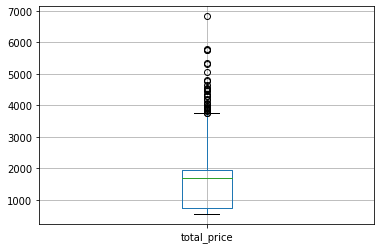

In [86]:
data.boxplot('total_price')

Заметим, что у нас встречаются данные, которые находятся выше верхней границы, можем их убрать. Это примерно 3800.

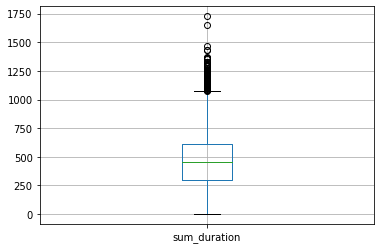

In [87]:
data.boxplot('sum_duration')

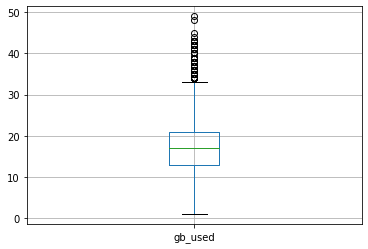

In [88]:
data.boxplot('gb_used')

Как показывает график, всё что чуть выше 1000 минут, является выбросами данных.

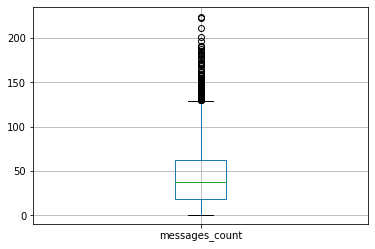

In [89]:
data.boxplot('messages_count')

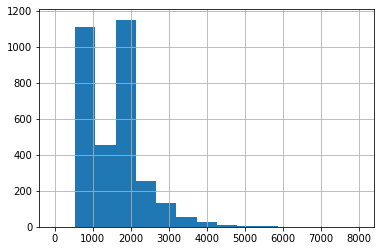

In [90]:
data['total_price'].hist(bins=15,range=(0,8000))

In [91]:
data_boxplot = data.query('total_price <= 3800').query('sum_duration <= 1075').query('messages_count <= 130').query('gb_used <=32')

----------
### Комментарий от наставника

Тут получается интересная ситуация: мы удаляем строки с определенными параметрами. А если сделать это до объединения данных? Например, у пользователя user_id=1000 было 150 сообщений и использовано 10 гигабайт интернета. Если удалить messages_count <= 130, то данные по 10Гб интернета тоже удалятся. 

А если изначально (до объединения) таблиц удалить строчку с сообщениями, то в итоговой таблице запись с 10Гб интернета останется.

----------

In [92]:
data_boxplot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2481 entries, (1000, ultra, Краснодар, 5) to (1499, smart, Пермь, 12)
Data columns (total 18 columns):
GB_per_month_included    2481 non-null float64
count_duration           2481 non-null float64
gb_used                  2481 non-null int64
messages_count           2481 non-null float64
messages_included        2481 non-null int64
minutes_included         2481 non-null int64
rub_monthly_fee          2481 non-null int64
rub_per_gb               2481 non-null int64
rub_per_message          2481 non-null int64
rub_per_minute           2481 non-null int64
sum_duration             2481 non-null float64
balance_calls            2481 non-null float64
balance_internet         2481 non-null float64
balance_messages         2481 non-null float64
surcharge_messages       2481 non-null float64
surcharge_calls          2481 non-null float64
surcharge_internet       2481 non-null float64
total_price              2481 non-null float64
dtypes: float64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, ultra, Краснодар, 5) to (1499, smart, Пермь, 12)
Data columns (total 18 columns):
GB_per_month_included    3203 non-null float64
count_duration           3163 non-null float64
gb_used                  3203 non-null int64
messages_count           2706 non-null float64
messages_included        3203 non-null int64
minutes_included         3203 non-null int64
rub_monthly_fee          3203 non-null int64
rub_per_gb               3203 non-null int64
rub_per_message          3203 non-null int64
rub_per_minute           3203 non-null int64
sum_duration             3163 non-null float64
balance_calls            3163 non-null float64
balance_internet         3203 non-null float64
balance_messages         2706 non-null float64
surcharge_messages       3203 non-null float64
surcharge_calls          3203 non-null float64
surcharge_internet       3203 non-null float64
total_price              3203 non-null float64
dtypes: float64

Я предлагаю проверить два варианта развития событий. В одной таблице удалить все данный который находятся выше верхней границы boxplota , вторую оставить без изменений. И посмотреть сильно ли будут влиять выбросы данных на исходный результат. Заметим, что удаление выбросов мы потеряли 722 строки.

----

# Задание 3

----

----

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

----

Для начала найдем средние значения для каждого тарифа, используя таблицу без изменений.

In [94]:
mean_smart = data.query('tariff == "smart"')
mean_ultra = data.query('tariff == "ultra"')

In [95]:
mean_ultra_1 = mean_ultra.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')
mean_smart_1 = mean_smart.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')

In [96]:
mean_smart_1.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
smart,60.0,17,34.0,435.5,1072.5


In [97]:
mean_ultra_1.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
ultra,76.0,19,51.0,548.0,1950.0


По таблице хорошо видно, что пользователи тарифа ultra больше пользуются звонками, сообщениями и интернетом, а так же платят за это в среднем большую сумму 

Сделаем всё тоже самое только для таблицы без выбросов данных!

In [98]:
mean_smart2 = data_boxplot.query('tariff == "smart"')
mean_ultra2 = data_boxplot.query('tariff == "ultra"')
mean_ultra_3 = mean_ultra2.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')
mean_smart_3 = mean_smart2.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')

In [99]:
mean_smart_3.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
smart,60.0,16,33.0,436.0,1027.0


In [100]:
mean_ultra_3.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
ultra,72.0,18,47.0,526.0,1950.0


Заметим, что особо больших различий не наблюдается. Попробуем удалить выбросы только в total_price <= 3800

In [101]:
data_total = data.query('total_price <= 3800')

In [102]:
mean_smart_price = data_total.query('tariff == "smart"')
mean_ultra_price = data_total.query('tariff == "ultra"')
mean_ultra_price1 = mean_ultra_price.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')
mean_smart_price1 = mean_smart_price.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration','total_price'), aggfunc='median')

In [103]:
mean_smart_price1.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
smart,59.0,17,34.0,433.0,1044.5


In [104]:
mean_ultra_price1.head()

,count_duration,gb_used,messages_count,sum_duration,total_price
tariff,,,,,
ultra,76.0,19,51.0,548.0,1950.0


Оставим эти значений для дальнейшей обработки.

##### Посчитаем дисперсию для двух тарифов.

In [105]:
variance_smart = np.var(mean_smart_price)
print(variance_smart)

GB_per_month_included         0.000000
count_duration              637.668075
gb_used                      30.707286
messages_count              704.106540
messages_included             0.000000
minutes_included              0.000000
rub_monthly_fee               0.000000
rub_per_gb                    0.000000
rub_per_message               0.000000
rub_per_minute                0.000000
sum_duration              35975.457725
balance_calls             35975.457725
balance_internet             30.707286
balance_messages            704.106540
surcharge_messages         1570.481784
surcharge_calls           64541.719134
surcharge_internet       466595.391649
total_price              563179.440162
dtype: float64


In [106]:
variance_ultra = np.var(mean_ultra_price)
print(variance_ultra)

GB_per_month_included        0.000000
count_duration            1781.150762
gb_used                     88.621940
messages_count            2107.131681
messages_included            0.000000
minutes_included             0.000000
rub_monthly_fee              0.000000
rub_per_gb                   0.000000
rub_per_message              0.000000
rub_per_minute               0.000000
sum_duration             97957.092260
balance_calls            97957.092260
balance_internet            88.621940
balance_messages          2107.131681
surcharge_messages           0.000000
surcharge_calls              0.000000
surcharge_internet       99968.740100
total_price              99968.740100
dtype: float64


##### Посчитаем стандартное отклонение для двух тарифов.

In [107]:
std_smart = np.std(mean_smart_price)
print(std_smart)

GB_per_month_included      0.000000
count_duration            25.252091
gb_used                    5.541416
messages_count            26.535006
messages_included          0.000000
minutes_included           0.000000
rub_monthly_fee            0.000000
rub_per_gb                 0.000000
rub_per_message            0.000000
rub_per_minute             0.000000
sum_duration             189.671974
balance_calls            189.671974
balance_internet           5.541416
balance_messages          26.535006
surcharge_messages        39.629305
surcharge_calls          254.050623
surcharge_internet       683.077881
total_price              750.452823
dtype: float64


In [108]:
std_ultra = np.std(mean_ultra_price)
print(std_ultra)

GB_per_month_included      0.000000
count_duration            42.203682
gb_used                    9.413923
messages_count            45.903504
messages_included          0.000000
minutes_included           0.000000
rub_monthly_fee            0.000000
rub_per_gb                 0.000000
rub_per_message            0.000000
rub_per_minute             0.000000
sum_duration             312.980977
balance_calls            312.980977
balance_internet           9.413923
balance_messages          45.903504
surcharge_messages         0.000000
surcharge_calls            0.000000
surcharge_internet       316.178336
total_price              316.178336
dtype: float64


Ради интереса решил попробовать другой метод построения графиков.

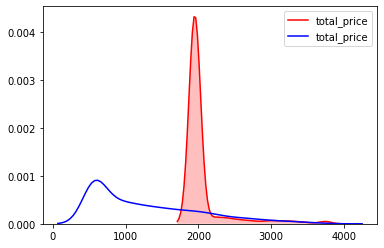

In [109]:
p=sns.kdeplot(mean_ultra_price['total_price'], shade=True, color="r")
p=sns.kdeplot(mean_smart_price['total_price'], shade=False, color="b")

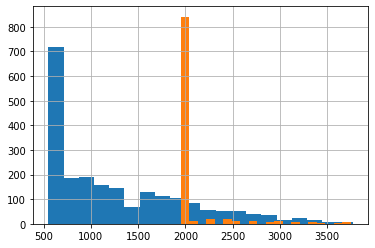

In [110]:
mean_smart_price['total_price'].hist(bins=20)
mean_ultra_price['total_price'].hist(bins=20)

Я считаю, что в данном случае лучше использовать гистограмму она более наглядно показывает данные.

Из этих гистограмм видно, что пользователи тарифа smart частенько не укладываются в лимиты тарифа. Но всё же для большинства выгоднее так, чем платить 1950р за тариф ultra. Пользователи тарифа ultra достаточно редко переплачивают сверх фиксированной цены.

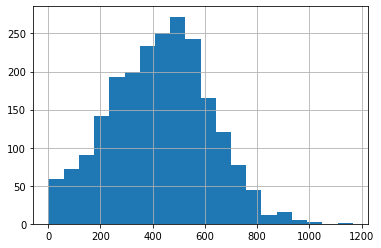

In [111]:
mean_smart_price['sum_duration'].hist(bins=20)

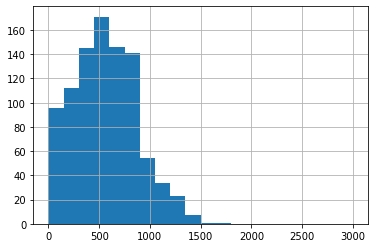

In [112]:
mean_ultra_price['sum_duration'].hist(bins=20,range=(0,3000))

Так же по количеству использованных минут, видно, что пользователи тарифа smart частенько выходят из лимита в 500 минту, а пользователи тарифа ultra обычно не тратят даже половины лимита.

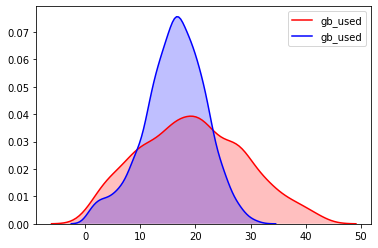

In [113]:
p1=sns.kdeplot(mean_ultra_price['gb_used'], shade=True, color="r")
p1=sns.kdeplot(mean_smart_price['gb_used'], shade=True, color="b")

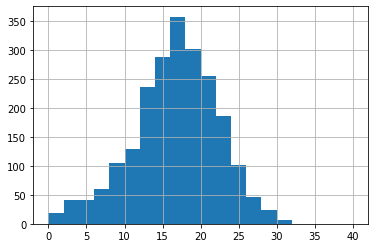

In [114]:
mean_smart_price['gb_used'].hist(bins=20,range=(0,40))

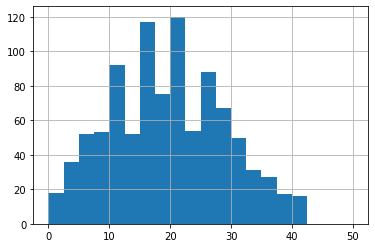

In [115]:
mean_ultra_price['gb_used'].hist(bins=20,range=(0,50))

15гб лимита так же не хватает большому количеству пользователей тарифа smart. Некоторым пользователям тарифа ultra не хватает и 30гб лимита, но большинство всё же укладывается в лимит.

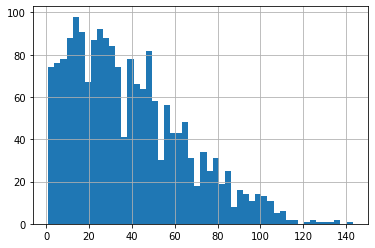

In [116]:
mean_smart_price['messages_count'].hist(bins=50)

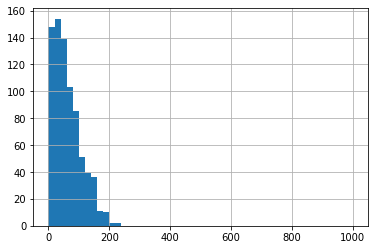

In [117]:
mean_ultra_price['messages_count'].hist(bins=50, range=(0,1000))

Многим пользователям тарифа smart не хватает 50 сообщений в месяц.
Пользователи ultra практически не превышают 20% от лимита сообщений.

На этих графиках показано биномиальное распределение.

-----

# Задание 4

-----

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

##### Проверим гипотезу о том, что средняя выручка тарифов различается.

In [118]:
from scipy import stats as st

In [119]:
ultra_price = mean_ultra_price['total_price']
smart_price = mean_smart_price['total_price']

In [120]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(ultra_price,smart_price)
    

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 1.2389154647230643e-184
Не получилось отвергнуть нулевую гипотезу


##### Проверим что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [121]:
price_moscow = data_total.query('city == "Москва"')
price_other = data_total.query('city != "Москва"')

In [122]:
price_moscow_sum = price_moscow['total_price']
price_other_sum = price_other['total_price']

In [123]:
alpha = .05
results = st.ttest_ind(price_other_sum, price_moscow_sum)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")

p-значение: 0.2550491531680216
Отвергаем нулевую гипотезу


Что бы понять какой тариф принесет больше денег посчитаем выручку

In [124]:
a = mean_ultra_price['total_price'].sum()
b = mean_smart_price['total_price'].sum()

In [125]:
print(a,b)

1978650.0 2804386.0


Найдем разницу в количестве пользователей тарифов.

In [126]:
c = len(mean_smart_price) - len(mean_ultra_price)

In [127]:
print(c)

1239


и найдем сколько % пользователей тарифа ultra составляет от пользователей тарифа smart

In [128]:
abc = len(mean_ultra_price) / len(mean_smart_price) * 100

In [129]:
print(abc)

43.78402903811252


In [130]:
ac = a* abc / 100 + a

In [131]:
print(int(ac),b)

2844982 2804386.0


Получаем практически равную сумму выручки, учитывая то, что к тарифу ultra должны подключиться ещё 1239 пользователей.

---- 
## Вывод

Отсюда можно сделать вывод, что будет перспективнее выделить больший рекламный бюджет на тариф smart. Как мы видим по результатам всех исследований. Пользователи охотнее выбирают тариф смарт скорее всего из-за его цены в 550р, а так же большинство пользователей не укладываются в лимиты тарифа и приносят дополнительные деньги каждый месяц. Несмотря на то, что средний чек пользователей отличается практически в два раза. Количество людей выбирающих тариф smart будет больше благодаря своей тарифной цене. Отсюда и больший доход для оператора. 

 * В среднем пользователи тарифа смарт используют в месяц 17гб трафика, отправляют 34 сообщения и тратят 433 минуты. Средние затраты для пользователя составляют 1044,5р.
 * В среднем пользователи тарифа ультра используют в месяц 19гб трафика, отправляют 51 сообщения и тратят 548 минут.
Средние затраты для пользователя составляют 1950р.

Так же проверили гипотезы что:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Первая гипотеза подтверждается!
Вторая гипотеза отвергается!

-----

----

## Удаление выбросов до объединения

----

In [132]:
calls_query = calls_sum.query('sum_duration <= 1075')
internet_query = internet_sum.query('gb_used <=32')
message_query = messages_sum.query('messages_count <= 130')
tariff_query = tariffs.copy()

In [133]:
calls_intnernet_query = internet_query.reset_index().merge(calls_query, on = ['user_id', 'month'], how='left', left_index = True)


In [134]:
calls_internet_mes_query = calls_intnernet_query.reset_index().merge(message_query, on = ['user_id', 'month'], how='left', left_index = True )


In [135]:
users_data_query = calls_internet_mes_query.reset_index().merge(users, on = ['user_id'], how='left', left_index = True)


In [136]:
users_data_query = users_data_query.drop('level_0', 1)


In [137]:
users_data_query = users_data_query.drop('index', 1)

In [138]:
tariff_query.columns = ['messages_included', 'GB_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff']

In [139]:
total_query = users_data_query.merge(tariff_query, on = ['tariff'], how='left', left_index = True)

In [140]:
total_query['balance_calls'] = total_query['minutes_included'] - total_query['sum_duration']
total_query['balance_internet'] = total_query['GB_per_month_included'] - total_query['gb_used']
total_query['balance_messages'] = total_query['messages_included'] - total_query['messages_count']

total_query['surcharge_internet'] = abs(total_query.loc[total_query['balance_internet'] < 0, 'balance_internet'] * total_query['rub_per_gb'])

total_query['surcharge_calls'] = abs(total_query.loc[total_query['balance_calls'] < 0, 'balance_calls'] * total_query['rub_per_minute'])


total_query['surcharge_messages'] = abs(total_query.loc[total_query['balance_messages'] < 0, 'balance_messages'] * total_query['rub_per_message'])

In [141]:
smart_query = total_query.query('tariff == "smart"')
ultra_query = total_query.query('tariff == "ultra"')

In [142]:
mean_ultra_query = ultra_query.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration'), aggfunc='median')
mean_smart_query = smart_query.pivot_table(index=['tariff'], values=('count_duration','gb_used','messages_count','sum_duration',), aggfunc='median')

In [143]:
mean_ultra_query

,count_duration,gb_used,messages_count,sum_duration
tariff,,,,
ultra,71.5,18,45.0,520.0


In [144]:
mean_smart_query

,count_duration,gb_used,messages_count,sum_duration
tariff,,,,
smart,60.0,17,33.0,434.0
